# Projet 02 – A/B Testing
## Objectif : Comparer les taux de conversion entre deux groupes

In [6]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style='whitegrid')

In [11]:
import os

file_path = r"C:\Users\hp\Downloads\PortfolioDataScience\projet_02_ab_testing\ab_data.csv"
if os.path.exists(file_path):
	df = pd.read_csv(file_path)
	display(df.head())
else:
	print(f"Le fichier n'existe pas : {file_path}")

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


       group  converted
0    control   0.120399
1  treatment   0.118920


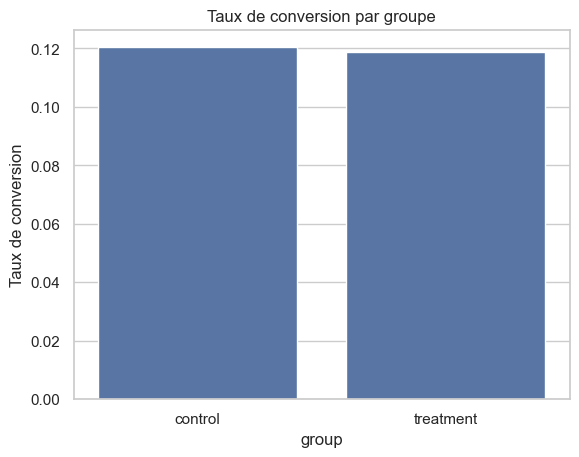

In [12]:
# Taux de conversion par groupe
conversion_rates = df.groupby('group')['converted'].mean().reset_index()
print(conversion_rates)

# Visualisation
sns.barplot(data=conversion_rates, x='group', y='converted')
plt.title('Taux de conversion par groupe')
plt.ylabel('Taux de conversion')
plt.show()

In [13]:
# Séparer les groupes
control = df[df['group'] == 'control']['converted']
treatment = df[df['group'] == 'treatment']['converted']

# Test t de Student (indépendant, bilatéral)
t_stat, p_value = stats.ttest_ind(treatment, control)
print(f"Statistique t : {t_stat:.4f}")
print(f"p-value : {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("❗ Il y a une différence significative entre les groupes.")
else:
    print("✅ Aucune différence significative détectée.")

Statistique t : -1.2369
p-value : 0.2161
✅ Aucune différence significative détectée.
